# Bifurcation sequences explain shifts in the neuronal electrophysiological phenotype caused by changes in potassium channel expression

## Julio César Reyes-Garibaldi$^{1,2}$, Marco Arieli Herrera-Valdez$^{1,2,*}$
$^1$ Departmento de Matemáticas, Facultad de Ciencias, UNAM
$^2$ Laboratorio de Dinámica, Biofísica, y Fisiología de Sistemas, Facultad de Ciencias, UNAM
$^∗$ Corresponding Author: marcoh ciencias.unam.mx

In [46]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from neuronalEPhysPheno_baseCode import *
import matplotlib 
#%matplotlib.use('macosx')
%matplotlib widget
#%matplotlib notebook

eCharge=1.60217733e-19 # Coulombs; 
kBoltzmann=1.38065812e-20 #mJ/K
zeroT=273.15 #deg Kelvin
TCelcius = 36
v_T = kBoltzmann * (zeroT + TCelcius)/ eCharge
C_m = 20.0; vTCm= v_T * C_m
print(r'v_T=%g, C_m=%g, v_T C_m= %g'%(v_T,C_m, vTCm))
#
voltages = {'u_w':-10.0/v_T, 'u_m': -20.0/v_T,'u_U':60.0/v_T, 'u_D':-90.0/v_T, 'u_UD':-80.0/v_T}
biases = {'b_w':0.65, 'b_U':0.5, 'b_D':0.3, 'b_UD':0.1, 'g_m':4, 'g_w':2.2, 'kappa_w':0.35}
rates = {'r_w':0.25, 'a_F': 0*100 / vTCm, 'r_U':1, 'r_D':1, 'r_UD':1e-4, 'a_U': 4, 'a_D': 6, 'a_UD':800}
numerics = {'timeMin': -0.0, 'timeMax':300.0, 'timeStep':1/40.0, 'ic': np.array([0.0001, -60.0/v_T]),\
            'uMin':-90/v_T,'uMax':40/v_T, 'wMin':0,'wMax':1, 'uStep':0.1/v_T,'wStep':0.01}
p = {'v_T': v_T, 'C_m':C_m, 'vTCm': v_T * C_m}
p= {**p, **voltages, **biases, **rates, **numerics}
#
def setBaseParameters(upDn):
    print('Resetting parameters...')
    upDn.uRange = np.arange(upDn.pars['uMin'], upDn.pars['uMax'], upDn.pars['uStep'])
    upDn.wRange = np.arange(upDn.pars['wMin'], upDn.pars['wMax'], upDn.pars['wStep'])
    upDn.pars['vMin'] = upDn.pars['uMin'] * upDn.pars['v_T']
    upDn.pars['vMax'] = upDn.pars['uMax'] * upDn.pars['v_T']
    upDn.pars['u_m']= -16.0/v_T; upDn.pars['g_m']= 4;  
    upDn.pars['u_w']= -10.0/v_T; upDn.pars['g_w']= 2.2; upDn.pars['b_w'] = 0.65; upDn.pars['kappa_w']=0.35; upDn.pars['r_w'] = 0.25
    upDn.pars['b_D']= 0.3; #upDn.pars['b_UD']= 0.8
    upDn.pars['a_F'] = 0 / vTCm; # 70 pA en rheobase 
    upDn.pars['a_U'] = 4.; upDn.pars['a_D'] = 6; upDn.pars['a_UD'] = 800
    upDn.pars['timeMax'] = 500.0; upDn.pars['timeStep']=1/60.0; 
    upDn.pars['ic'] = np.array([-80.0/upDn.pars['v_T'], 0.001])
    return upDn

upDn = UD(params= p, variables=['u','w'] )
upDn = setBaseParameters(upDn)

v_T=26.6407, C_m=20, v_T C_m= 532.813
Setting u and w as state variables
self.u, self.w = sy.symbols(['u', 'w'])
Defining all functions. Notice v is u normalized by v_T
Resetting parameters...


### Figure 1

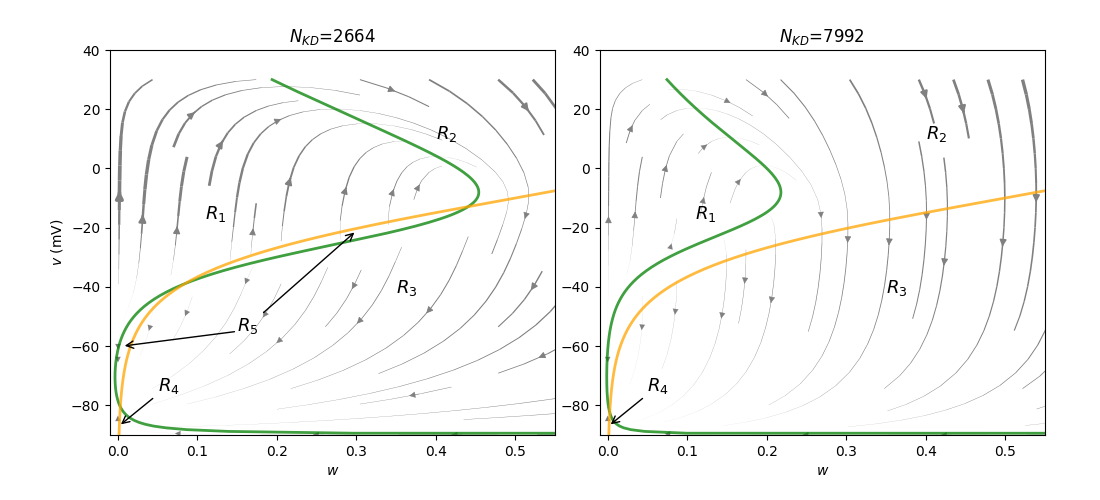

In [19]:
# -------------
# Fig 1. Two kinds of partitions of the phase plane 
# Needs fixed points by type and different slopes
# -------------
#upDn.resetParameters()
def figure1_partitionsPP(aDs = np.array([5, 15]),wMin=0,wMax=1,nWPts=100, vMin=-90,vMax=30,nVPts=200,saveFig=0, fs=13):
    f = pl.figure(figsize=(11,5)); pl.ioff(); 
    ax = list(); rows = 1; cols= len(aDs);
    for n in range(rows*cols):
        upDn.pars['a_D']= aDs[n]
        ax.append(f.add_subplot(rows,cols,n+1))  
        upDn.phasePlane(ax=ax[n], W = np.linspace(wMin,wMax,nWPts), V = np.linspace(vMin,vMax,nVPts), \
            wNullLabel=r'$\partial_t w = 0$', vNullLabel=r'$\partial_t v = 0$', plotNullClines=1)
        ax[n].set_ylim(upDn.pars['vMin'],upDn.pars['vMax'])
        ax[n].set_xlim(-0.01,0.55)
        ax[n].set_xlabel(r'$w$')
        ax[n].set_title(r'$N_{KD}$=%d'%(upDn.N_D.subs(upDn.pars)))
    ax[0].set_ylabel(r'$v$ (mV)')
    for nn in range(2):
        ax[nn].text(0.11,-17,r'$R_1$', fontsize = fs)
        ax[nn].text(0.4,10,r'$R_2$', fontsize = fs)
        ax[nn].text(0.35,-42, r'$R_3$',fontsize = fs)
        ax[nn].annotate(r"$R_4$", xy=(0.001,-87), xytext=(0.05,-75),
            arrowprops=dict(arrowstyle="->"),fontsize=fs)
    
    ax[0].annotate(r"$R_5$", xy=(0.3, -21), xytext=(0.15,-55),
            arrowprops=dict(arrowstyle="->"),fontsize=fs)
    ax[0].annotate("", xy=(0.005,-60), xytext=(0.15,-55),
            arrowprops=dict(arrowstyle="->"),fontsize=fs)
    pl.subplots_adjust(left=0.1, right=0.95, bottom=0.13,  top=0.9, wspace=0.1, hspace=0.25)
    pl.ion(); pl.draw(); pl.show()
    if saveFig>0:
        figName1 = './twoTypesPP_NKD_2131_7992_labeled.jpg'
        figName2 = './twoTypesPP_NKD_2131_7992_labeled.png'
        f.savefig(figName1,transparent=True)
        f.savefig(figName2,transparent=True)
    return f


figure1= figure1_partitionsPP(aDs = np.array([5, 15]),wMin=0,wMax=1,nWPts=100, vMin=-90,vMax=30,nVPts=200,saveFig=1)

### Figure 2

Max dv/dt = 0.129865 V/s
Max dv/dt = 262.672 V/s
Max dv/dt = 254.192 V/s
Max dv/dt = 0 V/s
Max dv/dt = 0.960149 V/s
$N_{KD}$= 2131
Generating plots of the time course, phase plane, and $v$ vs $dv/dt$ with trajectories from different initial conditions
dvdt in [-54.3586, 0.129865]
dvdt in [-70.7312, 262.672]
dvdt in [-70.465, 254.192]
dvdt in [-1.28618, 0]
dvdt in [0, 0.960149]


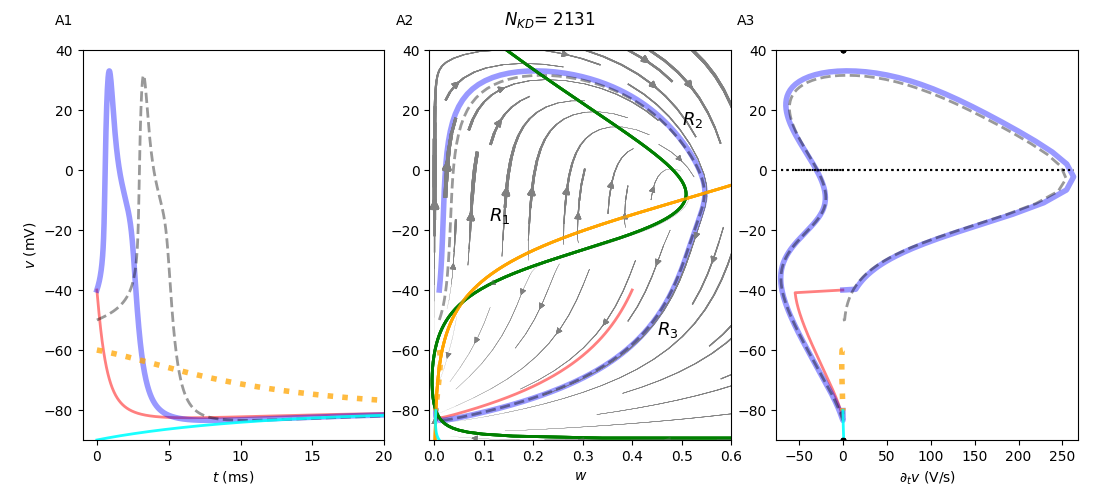

Max dv/dt = 0.453991 V/s
Max dv/dt = 242.182 V/s
Max dv/dt = 0.00123233 V/s
Max dv/dt = 0.000107455 V/s
Max dv/dt = 0.959191 V/s
$N_{KD}$= 8525
Generating plots of the time course, phase plane, and $v$ vs $dv/dt$ with trajectories from different initial conditions
dvdt in [-236.989, 0.453991]
dvdt in [-155.457, 242.182]
dvdt in [-6.02357, 0.00123233]
dvdt in [-4.0807, 0.000107455]
dvdt in [-1.24172e-08, 0.959191]


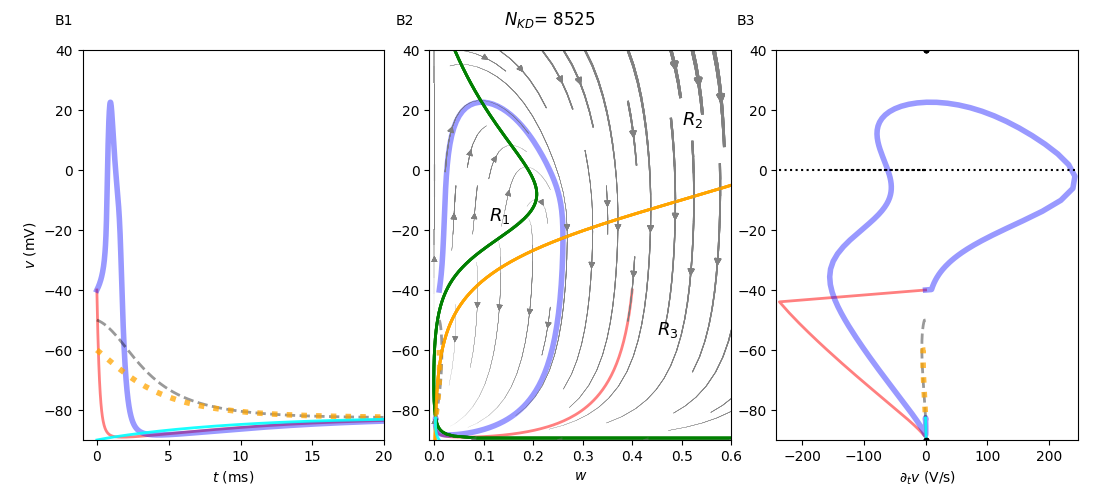

In [27]:
def plotProfile_v_twdvdt(ax3p, orbits,markers = ['-','--',':','-','-'],colors = ['blue', 'black', 'red', 'cyan'],\
                         lws = [4,2,1,4,2], transp=[1, 0.4, 0.6, 0.75, 0.9],wMax = 0.6):
    print('Generating plots of the time course, phase plane, and $v$ vs $dv/dt$ with trajectories from different initial conditions')
    nIcs = len(orbits)
    dvMax = 0; dvMin=0;
    for n in range(nIcs):
        dvMax = np.maximum(dvMax, orbits[n]['dvdt'].max())
        dvMin = np.minimum(dvMin, orbits[n]['dvdt'].min())
        ax3p[0].plot(orbits[n]['timeSamples'], orbits[n]['vOrbit'], markers[n], lw=lws[n], color=colors[n], alpha=transp[n], label =r'$(t, v)$')
        ax3p[0].set_xlim(-1,20)
        upDn.phasePlane(ax=ax3p[1], W = np.linspace(0,1,50), V = np.linspace(upDn.pars['vMin'],upDn.pars['vMax'],200), \
            wNullLabel=r'', vNullLabel=r'', plotNullClines=1)
        ax3p[1].plot(orbits[n]['wOrbit'], orbits[n]['vOrbit'], markers[n], lw=lws[n], color=colors[n], alpha=transp[n], label =r'$(w,v)$')
        ax3p[1].set_xlim(-0.01,wMax)
        ax3p[2].plot(orbits[n]['dvdt'], orbits[n]['vOrbit'], markers[n], lw=lws[n], color=colors[n], alpha=transp[n], label =r'$( \partial_t v, v)$')
        ax3p[2].plot([0,0],[upDn.pars['uMin'] *upDn.pars['v_T'],upDn.pars['uMax'] *upDn.pars['v_T']],'k.',lw=1)
        ax3p[2].plot([orbits[n]['dvdt'].min(),orbits[n]['dvdt'].max()],[0,0],'k:')
        print('dvdt in [%g, %g]'%(orbits[n]['dvdt'].min(),orbits[n]['dvdt'].max()))

    ax3p[0].set_ylabel(r'$v$ (mV)'); 
    ax3p[0].set_xlabel(r'$t$ (ms)')
    ax3p[1].set_xlabel(r'$w$'); 
    ax3p[2].set_xlabel(r'$\partial_t v$ (V/s)')
    for m in range(3): 
        ax3p[m].set_ylim(upDn.pars['vMin'],upDn.pars['vMax'])
    ax3p[2].set_xlim(dvMin-5,dvMax+5)
    return ax3p

#
def figure2_profile_v_twdvdt(vics,wics,aDs = np.arange(4,20,1),\
                            saveFigs = 0,markers = ['-','--',':','-','-'],colors = ['red', 'blue', 'black', 'cyan','orange'],\
                            lws = [4,2,1,4,2], transp=[1, 0.4, 0.6, 0.75, 0.9], fs=13   ):
    nIcs0 = len(vics)
    ics = np.zeros((nIcs0,2),'float64')
    ics[:,0] = vics; ics[:,1] = wics
    #
    nIcs = len(vics)
    profiles = list()
    figures = list()
    panelLabels =['A','B','C']
    for nn in range(len(aDs)):
        upDn.pars['a_D'] = aDs[nn]
        nkd = np.int32(aDs[nn] * upDn.pars['vTCm'])
        orbits = upDn.orbitsFromICs(ics)
        f = pl.figure(figsize=(11,5)); pl.ioff(); 
        f.suptitle(r'$N_{KD}$= %d'% nkd)
        print(r'$N_{KD}$= %d'% nkd)
        ax = list(); rows = 1; cols= 3;
        for m in range(rows*cols): 
            ax.append(f.add_subplot(rows,cols,m+1))  
            pl.figtext(0.05 + m*0.31, 0.95, '%s%d'%(panelLabels[nn],m+1))
        ax[1].text(0.11,-17,r'$R_1$', fontsize = fs)
        ax[1].text(0.5,15,r'$R_2$', fontsize = fs)
        ax[1].text(0.45,-55, r'$R_3$',fontsize = fs)
    
        ax = plotProfile_v_twdvdt(ax, orbits,markers,colors,lws,transp)
        pl.subplots_adjust(left=0.075, right=0.98, bottom=0.12,  top=0.90, wspace=0.15, hspace=0.25)
        pl.ion(); pl.draw(); pl.show()
        figName = r'./ePhysPhenotypes_NKD%d.png'%nkd
        if len(figName)>0: f.savefig(figName, transparent=True)
        profiles.append(orbits); figures.append(f)
    return profiles,figures

uics = np.array([-40, -40, -50, -60,-90])/upDn.pars['v_T']
upDn.updateFunctions()
wics = upDn.w_inf_(uics)
wics = 0.01 * np.ones(len(uics))
wics[0]=0.4
profiles, figures = figure2_profile_v_twdvdt(uics, wics, aDs = [4,16],saveFigs = 0,\
                                             markers = ['-','-','--',':','-','--'], colors = ['red','blue', 'black','orange', 'cyan', 'black'],\
                                                lws = [2,4,2,4,2], transp=[0.5, 0.4, 0.4, 0.75, 0.9] )


### Figure 3

[6.   6.25 6.5  6.75 7.   7.25 7.5  7.75 8.   8.25 8.5  8.75] 
 [3196 3330 3463 3596 3729 3862 3996 4129 4262 4395 4528 4662]


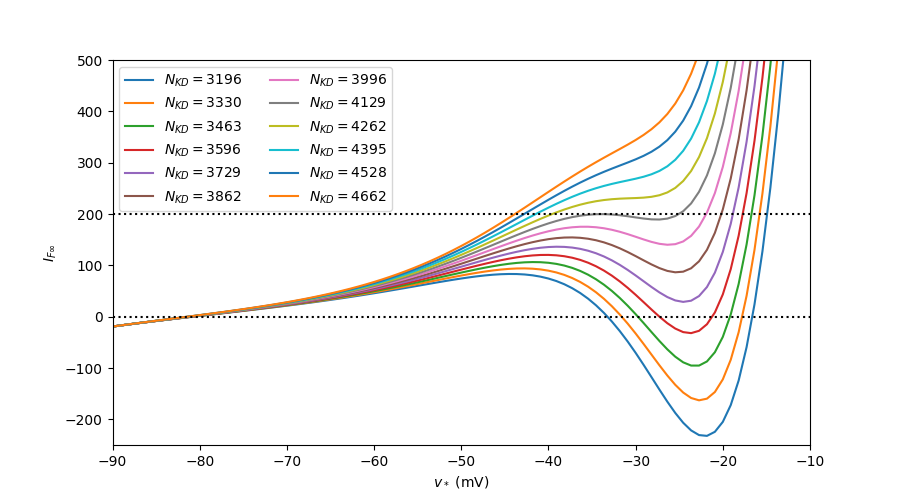

In [32]:
aDs = np.arange(6,9,0.25)
nDs = np.int32(aDs * upDn.pars['vTCm'])
print(aDs,'\n', nDs)
naDs = len(aDs); 
nPheno = len(aDs)
V = np.linspace(-90,0,100); U = V/upDn.pars['v_T']
f3 = pl.figure(figsize=(9,5)); pl.ioff()
ax = f3.add_subplot(111)
for n in range(nPheno):
    upDn.pars['a_D'] = aDs[n]
    nKD = np.int32(aDs[n] * upDn.pars['vTCm'])
    upDn.updateFunctions()
    aF = upDn.a_F_inf_(U) * upDn.pars['vTCm']
    ax.plot( V, aF,label=r'$N_{KD}=$%d'%nKD)
aFmarks = [0,200]
for aa in aFmarks:
    ax.plot([V.min(),V.max()],[aa,aa], 'k:')
ax.set_ylabel(r'$I_{F\infty}$')
ax.set_xlabel(r'$v_*$ (mV)')
ax.set_ylim(-250,500)
ax.set_xlim(-90,-10)
ax.legend(loc='upper left',ncols=2)
pl.ion(); pl.draw(); pl.show()
figName = r'./ePhysPhenotypes_aFSNBifurcation_NKDs%d-%d.png'%(nDs[0],nDs[-1])
if len(figName)>0: f3.savefig(figName, transparent=True)

### Figure 4

In [30]:
aDs = np.arange(4,30,1)
nDs = np.int32(aDs * upDn.pars['vTCm'])
print(aDs,'\n', nDs)
naDs = len(aDs); 
nPheno = len(aDs)
#
startTime = time.time()
upDn.updateFunctions()
startTime = time.time()
uStars = np.hstack([np.linspace(-90,-20,50),np.linspace(-20,0,50)])/upDn.pars['v_T']
uStars = np.linspace(-90,0,100)/upDn.pars['v_T']
wStars = upDn.w_inf_(uStars)
wStars 
fps = np.vstack([uStars,wStars]).transpose()
fpsTL = upDn.cod1SecondParameterVariation(secParName='a_D', secParVals = aDs, fps= fps)
print('Took %d seconds to calculate the fixed points and their types'%(time.time()-startTime))
#save_object(fpsL, "fpsTL")


[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29] 
 [ 2131  2664  3196  3729  4262  4795  5328  5860  6393  6926  7459  7992
  8525  9057  9590 10123 10656 11189 11721 12254 12787 13320 13853 14385
 14918 15451]
Processing 100 fixed points
Took 18 seconds to calculate the fixed point list for a_F
Processing 100 fixed points
Took 18 seconds to calculate the fixed point list for a_F
Processing 100 fixed points
Took 18 seconds to calculate the fixed point list for a_F
Processing 100 fixed points
Took 18 seconds to calculate the fixed point list for a_F
Processing 100 fixed points
Took 18 seconds to calculate the fixed point list for a_F
Processing 100 fixed points
Took 18 seconds to calculate the fixed point list for a_F
Processing 100 fixed points
Took 18 seconds to calculate the fixed point list for a_F
Processing 100 fixed points
Took 18 seconds to calculate the fixed point list for a_F
Processing 100 fixed points
Took 18 seconds to calculate the fixed po

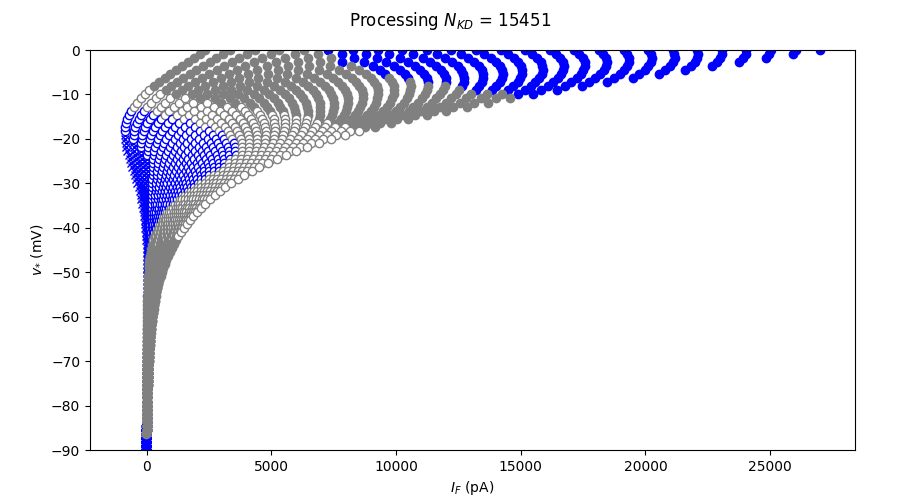

Took 485 seconds to plot these bifurcation diagrams


In [31]:
#
f = pl.figure(figsize=(9,5)); pl.ioff()
axBif = f.add_subplot(111)
for n  in range(nPheno):
    upDn.pars['a_D'] = aDs[n]
    tStr = r'Processing $N_{KD}$ = %d'%(nDs[n])
    axBif = upDn.bifurcationDiagram_Cod1(axBif, fpsTL[n], coordinate=0, fpScaleFactor=upDn.pars['v_T'],  \
                parScaleFactor= upDn.pars['vTCm'], xLabel=r'$I_F$ (pA)', yLabel=r'$v_{*}$ (mV)')

axBif.set_ylim(uStars.min()*upDn.pars['v_T'],uStars.max()*upDn.pars['v_T'])
f.suptitle(tStr)
pl.subplots_adjust(left=0.1, right=0.95, bottom=0.1,  top=0.9, wspace=0.1, hspace=0.25)
pl.ion(); pl.draw();pl.show()
figName = r'./ePhysPhenotypes_Bifurcation_NKDs%d-%d.png'%(nDs[0],nDs[-1])
if len(figName)>0: f.savefig(figName, transparent=True)
print('Took %d seconds to plot these bifurcation diagrams'%(time.time()-startTime))
#

### Figure 5

In [48]:
aDs = np.array([4,8])
nDs = np.int32 ( aDs * upDn.pars['vTCm'])
nPheno = len(aDs)
#
startTime = time.time()
upDn.updateFunctions()
startTime = time.time()
uStars = np.hstack([np.linspace(-90,-20,50),np.linspace(-20,0,50)])/upDn.pars['v_T']
uStars = np.linspace(-90,0,100)/upDn.pars['v_T']
wStars = upDn.w_inf_(uStars)
fps = np.vstack([uStars,wStars]).transpose()
#
fpsTL = upDn.cod1SecondParameterVariation(secParName='a_D', secParVals = aDs, fps= fps)
print('Took %d seconds to calculate these bifurcation diagrams'%(time.time()-startTime))
#
upDn.pars['timeMin'] = -10; upDn.pars['timeMax'] = 1000
timeStimStart=10; 
#
startTime = time.time()
iClampVolts = list()
iStimList = np.array([[32,33,436,437],[80,81,2212,2213]])/upDn.pars['vTCm']
for nn in range(nPheno):
    #iStim = np.arange(ampMin,ampMax,ampStep)/upDn.pars['vTCm']
    upDn.pars['a_D'] = aDs[nn]
    print('n_D = %g'% nDs[nn])
    upDn.updateFunctions() 
    uOrbit,wOrbit = upDn.trayectory_Autonomous(upDn.duw_)
    upDn.pars['ic'] = np.array([uOrbit[-1],wOrbit[-1]])
    print('Found steady state near (%g,%g)'%(upDn.pars['ic'][0]*upDn.pars['v_T'],upDn.pars['ic'][1]))
    #
    iStim = iStimList[nn]
    upDn.pars['timeMax'] = 150
    timeStimStop= upDn.pars['timeMax']
    iList = upDn.iClampSquareStims(iLevels=iStim, timeStimStart=timeStimStart, timeStimStop=timeStimStop)
    #
    upDn.updateFunctions()
    vOrbits = upDn.iClamp(iList) 
    iClampVolts.append(vOrbits)
    print('Took %d seconds to perform this I-clamp'%(time.time()-startTime))
print('Calculated responses to I-Clamp for N_KD en ', nDs)

Processing 100 fixed points
Took 18 seconds to calculate the fixed point list for a_F
Processing 100 fixed points
Took 18 seconds to calculate the fixed point list for a_F
Took 37 seconds to calculate these bifurcation diagrams
n_D = 2131
Found steady state near (18.9214,0.915934)
Took 2 seconds to perform this I-clamp
n_D = 4262
Found steady state near (6.89511e-14,0.695467)
Took 3 seconds to perform this I-clamp
Calculated responses to I-Clamp for N_KD en  [2131 4262]


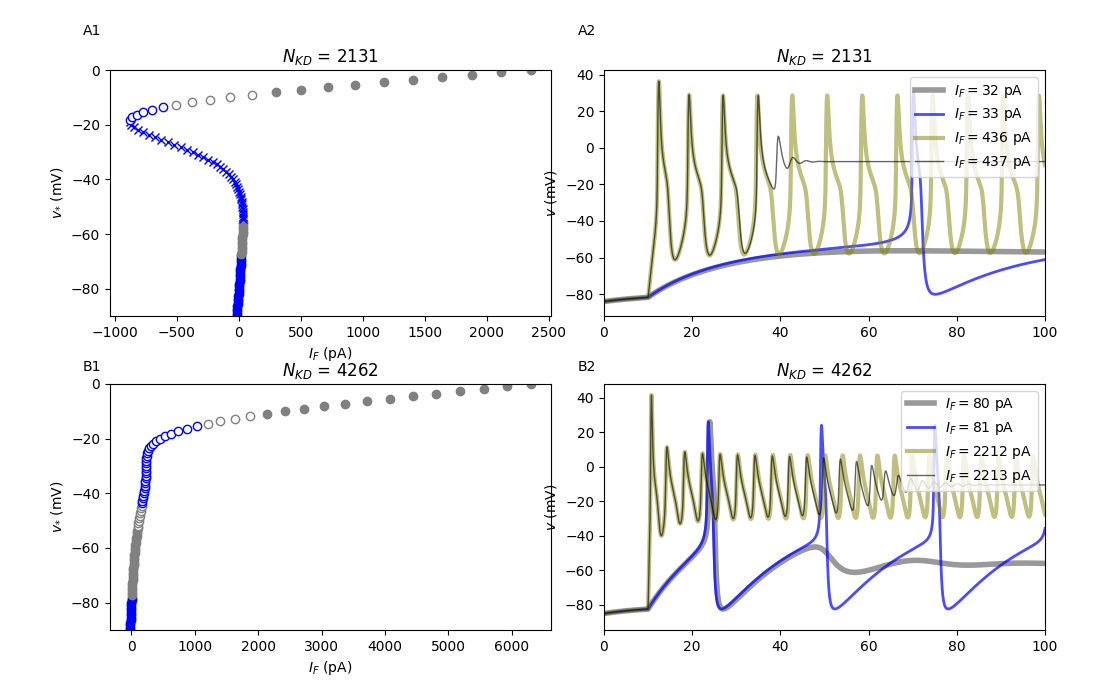

In [54]:
hShift = 0; vShift = 0; tMin = -50; tMax = upDn.pars['timeMax']
widths = [4,2,3,1]
colors = ['black','blue', 'olive', 'black']
transp = [0.4, 0.7, 0.5, 0.6]
labels = ['A', 'B']
#
f = pl.figure(figsize=(11,7)); pl.ioff(); rows = 2; cols=2
axBif =list(); axIC = list()
#
for n  in range(nPheno):
    for m in range(cols):
        pl.figtext(0.075 + (m*0.45), 1-0.05- (n * 0.48), '%s%d'%(labels[n],m+1))
    axBif.append(f.add_subplot(rows,cols, n*cols + 1))
    axIC.append(f.add_subplot(rows,cols, n*cols +2))
    upDn.pars['a_D'] = aDs[n]
    nkd = np.int32 ( aDs[n] * upDn.pars['vTCm'])
    axBif[n] = upDn.bifurcationDiagram_Cod1(axBif[n], fpsTL[n], coordinate=0, fpScaleFactor=upDn.pars['v_T'],  \
                parScaleFactor= upDn.pars['vTCm'], xLabel=r'$I_F$ (pA)', yLabel=r'$v_{*}$ (mV)')    
    axBif[n].set_ylim(uStars.min()*upDn.pars['v_T'],uStars.max()*upDn.pars['v_T'])
    tStr = r'$N_{KD}$ = %d'%(nkd) 
    axBif[n].set_title(tStr)
    #    
    vOrbits = iClampVolts[n] 
    nCommands = len(iStimList[n])
    for m in range(nCommands):
        axIC[n].plot(upDn.timeSamples - n*hShift, vOrbits[m]*upDn.pars['v_T'] + m*vShift, \
                     color = colors[m], lw = widths[m], alpha = transp[m], label = r'$I_F=%g$ pA'%(iStimList[n][m]*upDn.pars['vTCm']))
        axIC[n].legend(loc='upper right')
    axIC[n].set_ylabel(r'$v$ (mV)')
    tStr = r'$N_{KD}$ = %d'%(nDs[n])
    axIC[n].set_title(tStr)
    axIC[n].set_xlim(0,100)
    
pl.subplots_adjust(left=0.1, right=0.95, bottom=0.1,  top=0.9, wspace=0.12, hspace=0.275)
    

pl.ion(); pl.draw();pl.show()
figName = r'./ePhysPhenotypes_Bifurcation+IClamp_NKD%d.png'%nDs[n]
if len(figName)>0: f.savefig(figName, transparent=False)
    

### Figure 6

In [35]:
bifurcs = list()
for n in range(naDs):  #for each profile
    print('----------------\n Analyzing profile with N_KD = %d'%nDs[n])
    fpsL = fpsTL[n]
    bifurcs.append(findBifurcationsCod1_FPL(fpsL,parName='a_F'))
#save_object(bifurcs, "bifurcs")

AR_v = list(); RA_v=list(); AR_IF = list(); RA_IF=list()
for n in range(len(bifurcs)):
    print(n)
    AR_v.append( bifurcs[n]['lostAttract_v'][0])
    RA_v.append(bifurcs[n]['gainAttract_v'][0])
    AR_IF.append(bifurcs[n]['lostAttract_par'][0] * upDn.pars['vTCm'])
    RA_IF.append(bifurcs[n]['gainAttract_par'][0] * upDn.pars['vTCm'])

f5 = pl.figure(figsize=(9,7)); pl.ioff()
ax1 = f5.add_subplot(2,1,1)
ax2 = f5.add_subplot(2,1,2)
ax1.plot(nDs, AR_IF, '.', label = 'Attractivity loss')
ax1.plot(nDs, RA_IF, 'o', label = 'Recover attractivity')
ax2.plot(nDs, AR_v, '.', label = 'Attractivity loss')
ax2.plot(nDs, RA_v, 'o', label = 'Recover attractivity')
ax1.set_ylabel(r'$I$ (pA)' )
ax2.set_ylabel(r'$v_*$ (mV)' )
ax1.set_xlabel(r'$N_{KD}$')
ax2.set_xlabel(r'$N_{KD}$')
ax1.legend(loc='center right'); ax2.legend(loc='center right')
pl.ion(); pl.draw(); pl.show()
figName = r'./ePhysPhenotypes_attractLossGain_NKDs%d-%d.png'%(nDs[0],nDs[-1])
if len(figName)>0: f5.savefig(figName, transparent=True)


----------------
 Analyzing profile with N_KD = 2131


NameError: name 'vStar' is not defined